
 **Problem** **Statement**

 Dream Housing Finance company deals in all home loans.They have presence across all urban, semi urban and rural areas.Customer first apply for home loan after that company validates the customer eligibility for loan.Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.These details are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status.To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a classification problem where we have to predict whether a loan would be approved or not.

 **About** **the** **data**

 Given below is the description for each variable.

 Variable ----- Description

 Loan_ID -->> Unique Loan ID

 Gender -->> Male/ Female

 Married -->> Applicant married (Y/N)

 Dependents -->> Number of dependents

 Education -->> Applicant Education (Graduate/ Under Graduate)

 Self_Employed -->> Self employed (Y/N)

 ApplicantIncome -->> Applicant income

 CoapplicantIncome -->> Coapplicant income

 LoanAmount -->> Loan amount in thousands

 Loan_Amount_Term -->> Term of loan in months

 Credit_History -->> credit history meets guidelines

 Property_Area -->> Urban/ Semi Urban/ Rural

 Loan_Status -->> Loan approved (Y/N)

  **Import** **required** **packages**

In [1]:
import pandas as pd
import numpy as np

**Read** **Train** **and** **Test** **Data**

In [2]:
data1 = pd.read_csv("/content/Home_Loan Train.csv")
data2 = pd.read_csv("/content/Home_Loan Test.csv")

**Understanding** **the** **Data**

In [3]:
data1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
data2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
data1.shape, data2.shape

((614, 13), (367, 12))

In [8]:
data1.size, data2.size

(7982, 4404)

In [9]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


**Univariate** **Analysis**

**Target** **Variable**

In [11]:
data1["Loan_Status"].count()

614

In [12]:
data1["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
data1["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Loan_Status'}>

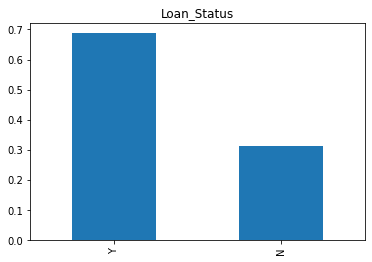

In [14]:
data1["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

The loan of 422(around 69%) people out of 614 was approved.

**Independent** **Variable** (**Categorical**)

**Analysis** **on** "**Gender**" **variable** :

In [15]:
data1["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
data1['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

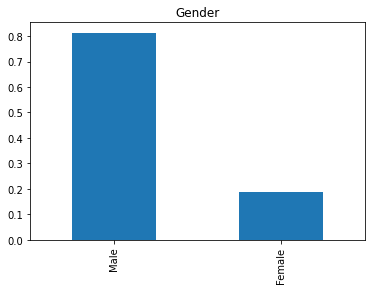

In [17]:
data1['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

In our train dataset the "Gender" variable contain Male : 81% Female:19%

**Analysis** **on** "**Married**" **variable** :

In [18]:
data1["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [19]:
data1['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

<AxesSubplot:title={'center':'Married'}>

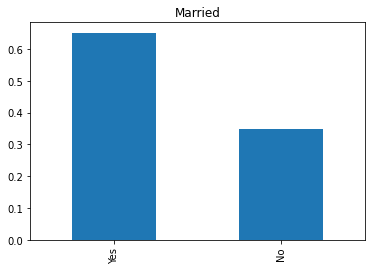

In [20]:
data1['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

From the Grapch we see that :
Number of married people : 65%
Number of unmarried people : 35%

**Analysis** **on** "**Self_Employed**" **variable** :

In [21]:
data1["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
data1['Self_Employed'].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

<AxesSubplot:title={'center':'Self_Employed'}>

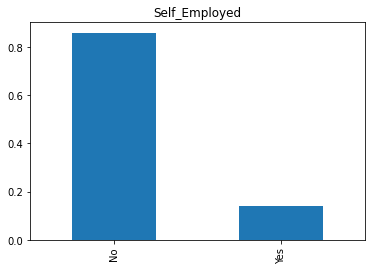

In [23]:
data1['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

**Analysis** **on** "**Credit_History**" **variable** :

In [24]:
data1["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [25]:
data1['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

<AxesSubplot:title={'center':'Credit_History'}>

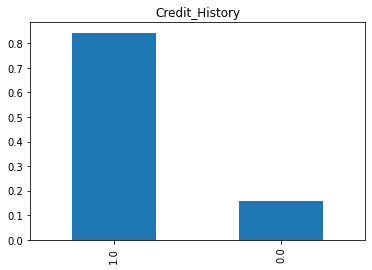

In [26]:
data1['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

Around 84% applicants have repaid their debts.

**Independent** **Variable** (**Ordinal**)

**Analysis** **on** "**Dependents**" **variable** :

In [27]:
data1["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [28]:
data1['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':'Dependents'}>

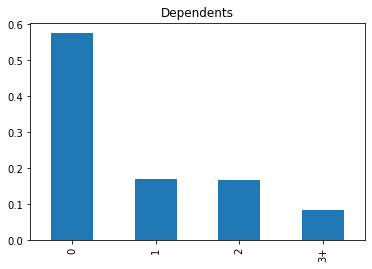

In [29]:
data1['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

**Analysis** **on** "**Education**" **variable** :

In [30]:
data1["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [31]:
data1["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

<AxesSubplot:title={'center':'Education'}>

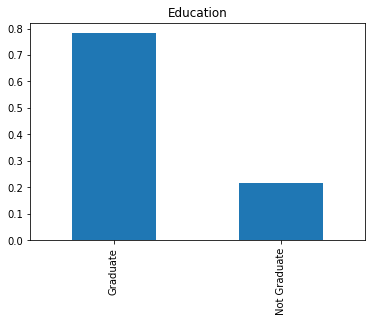

In [32]:
data1["Education"].value_counts(normalize=True).plot.bar(title = "Education")

Total number of People : 614

78% are Graduated and 22% are not Graduated

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

**Indepen**dent **Variable** (**Numerical**)

"**ApplicantIncome**" **distribution** :

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


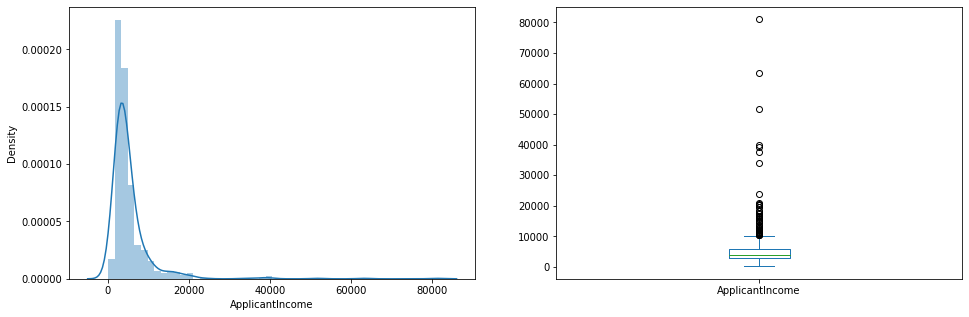

In [34]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data1["ApplicantIncome"]);

plt.subplot(122)
data1["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

"**CoapplicantIncome**" **distribution**

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


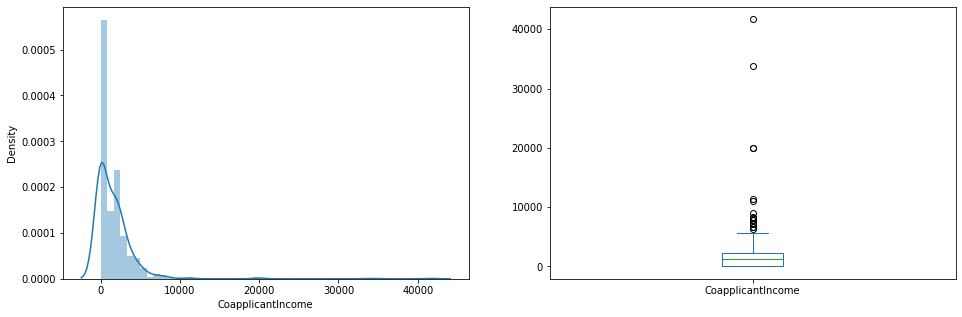

In [35]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data1["CoapplicantIncome"]);

plt.subplot(122)
data1["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

**distribution** **of** "**LoanAmount**" 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


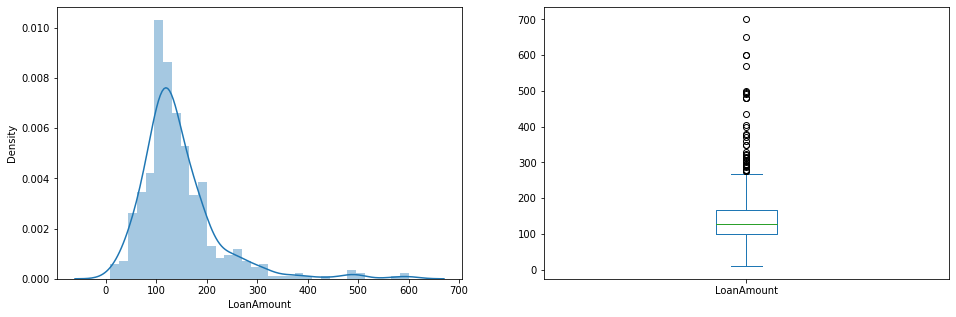

In [36]:
plt.figure(1)
plt.subplot(121)
df=data1.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
data1['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

**Bivariate** **Analysis**

**Categorical** **Independent** **Variable** vs **Target** **Variable**


**Relation** **between** "**Loan_Status**" **and** "**Gender**"

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


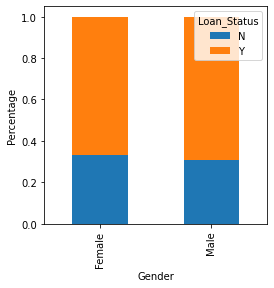

In [37]:
print(pd.crosstab(data1["Gender"],data1["Loan_Status"]))
Gender = pd.crosstab(data1["Gender"],data1["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approed : 75

Number of Male whose Loan was approed : 339

Number of Female whose Loan was not approed : 37

Number of Male whose Loan was not approed : 150

Proportion of Male applicants is higher for the approved loans.

**Relation** **between** "**Loan_Status**" **and** "**Married**"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


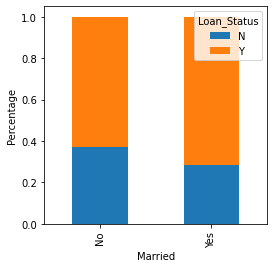

In [38]:
print(pd.crosstab(data1["Married"],data1["Loan_Status"]))
Married=pd.crosstab(data1["Married"],data1["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approed : 285

Number of married people whose Loan was not approed : 113

Number of unmarried people whose Loan was approed : 134

Number of unmarried people whose Loan was not approed : 79

Proportion of Married applicants is higher for the approved loans.

**Relat**ion **between** "**Loan_Status**" **and** "**Education**"

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


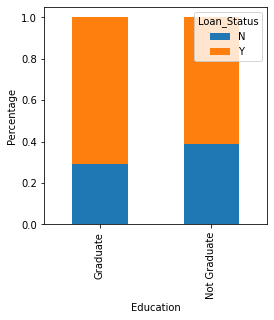

In [39]:
print(pd.crosstab(data1["Education"],data1["Loan_Status"]))
Education = pd.crosstab(data1["Education"],data1["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Number of people who are Graduate and Loan was approed : 340

Number of people who are Graduate and Loan was no approed : 140

Number of people who are Not Graduate and Loan was approed : 82

Number of people who are Not Graduate and Loan was not approed : 52

Proportion of Graduate applicants is higher for the approved loans

**Relation** **between** "**Loan_Status**" **and** "**Property_Area**"

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


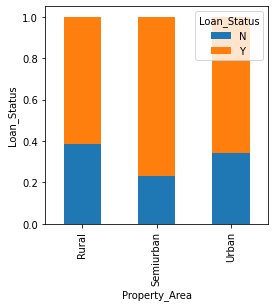

In [40]:
print(pd.crosstab(data1["Property_Area"],data1["Loan_Status"]))
PropertyArea = pd.crosstab(data1["Property_Area"],data1["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

In [41]:
data1['Dependents'].replace('3+',3,inplace=True)
data2['Dependents'].replace('3+',3,inplace=True)
data1['Loan_Status'].replace('N', 0,inplace=True)
data1['Loan_Status'].replace('Y', 1,inplace=True)

In [42]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


**Missing** **value** **imputation**

In [43]:
data1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
data1["Gender"].fillna(data1["Gender"].mode()[0],inplace=True)
data1["Married"].fillna(data1["Married"].mode()[0],inplace=True)
data1['Dependents'].fillna(data1["Dependents"].mode()[0],inplace=True)
data1["Self_Employed"].fillna(data1["Self_Employed"].mode()[0],inplace=True)
data1["Credit_History"].fillna(data1["Credit_History"].mode()[0],inplace=True)
data1["Loan_Amount_Term"].fillna(data1["Loan_Amount_Term"].mode()[0],inplace=True)

In [45]:
data1["LoanAmount"].fillna(data1["LoanAmount"].median(),inplace=True)

In [46]:
data1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
data2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [48]:
data2["Gender"].fillna(data2["Gender"].mode()[0],inplace=True)
data2['Dependents'].fillna(data2["Dependents"].mode()[0],inplace=True)
data2["Self_Employed"].fillna(data2["Self_Employed"].mode()[0],inplace=True)
data2["Loan_Amount_Term"].fillna(data2["Loan_Amount_Term"].mode()[0],inplace=True)
data2["Credit_History"].fillna(data2["Credit_History"].mode()[0],inplace=True)
data2["LoanAmount"].fillna(data2["LoanAmount"].median(),inplace=True)

In [49]:
data2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**Understanding** **the** **datatype** **of** **each** **feature**

In [50]:
data1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [51]:
categorical_list=('Gender','Married','Dependents','Education','Self_Employed','Property_Area')

In [52]:
for i in categorical_list:
  data1[i]=data1[i].astype('category').cat.codes

In [53]:
data1.dtypes

Loan_ID               object
Gender                  int8
Married                 int8
Dependents              int8
Education               int8
Self_Employed           int8
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area           int8
Loan_Status            int64
dtype: object

In [54]:
data2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [55]:
for i in categorical_list:
  data2[i]=data2[i].astype('category').cat.codes

In [56]:
data2.dtypes

Loan_ID               object
Gender                  int8
Married                 int8
Dependents              int8
Education               int8
Self_Employed           int8
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area           int8
dtype: object

In [57]:
plt.rcParams['figure.figsize']=(10,10)

<AxesSubplot:>

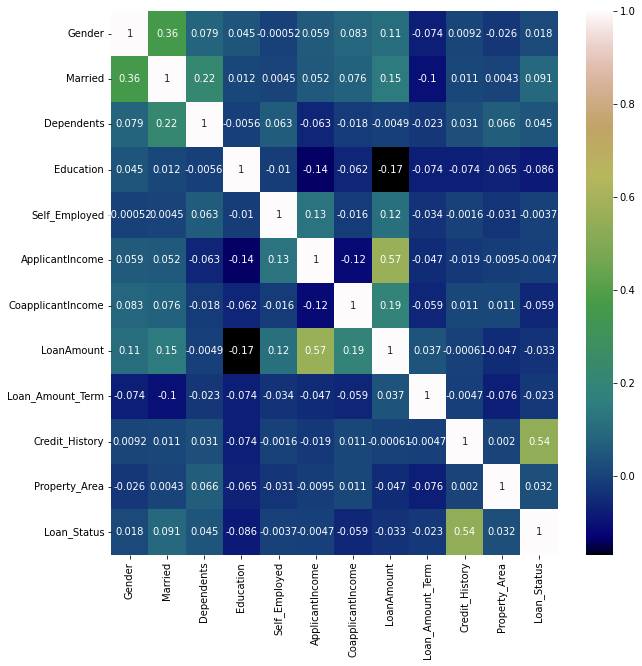

In [58]:
sns.heatmap(data1.corr(),annot=True,cmap='gist_earth')

In [59]:
data1=data1.drop(["ApplicantIncome","Credit_History"],axis=1)

In [60]:
data2=data2.drop(["ApplicantIncome","Credit_History"],axis=1)

In [61]:
data1=data1.drop(['Loan_ID'],axis=1)

In [62]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,1,0,1,0,0,0.0,128.0,360.0,2,1
1,1,1,2,0,0,1508.0,128.0,360.0,0,0
2,1,1,1,0,1,0.0,66.0,360.0,2,1
3,1,1,1,1,0,2358.0,120.0,360.0,2,1
4,1,0,1,0,0,0.0,141.0,360.0,2,1


In [63]:
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    def is_leaf_node(self):
        return self.value is not None
        
class DecisionTree:
    def __init__(self,min_samples_split=2, max_depth=100, n_features=None,chi_threshold=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
        self.tree=None
        self.chi_threshold = chi_threshold

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
    def _split(self, feature, threshold):
        left_idxs = np.where(feature <= threshold)[0]
        right_idxs = np.where(feature > threshold)[0]
        return left_idxs, right_idxs
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))
       # check the stopping criteria
        if (n_samples == 0, depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split or n_feats <= 1):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)
        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        if left.is_leaf_node() and right.is_leaf_node() and left.value == right.value:
            # both child nodes are leaf nodes with the same value, so make this node a leaf node too
            return Node(value=left.value)
        else:
           
            return Node(best_feature, best_thresh, left=left, right=right)
    
    def _best_split(self, X, y, feat_idxs):
        best_chi, split_idx, split_thresh = -np.inf, None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the chi-square score
                chi_score = self._chi_square_test(y, X_column, thr)

                if chi_score > best_chi:
                    best_chi = chi_score
                    split_idx = feat_idx
                    split_thresh = thr

        return split_idx, split_thresh

    def _chi_square_test(self, y, X_column, threshold):
        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return -np.inf,not -np
        
        # calculate the observed frequencies
        n_l, n_r = len(left_idxs), len(right_idxs)
        hist_l, hist_r = np.bincount(y[left_idxs]), np.bincount(y[right_idxs])

        # calculate the expected frequencies
        n_total = len(y)
        exp_l, exp_r = np.array([n_l*p for p in self._class_probabilities(y, left_idxs)]), np.array([n_r*p for p in self._class_probabilities(y, right_idxs)])

        # calculate the chi-square statistic
        chi_statistic = np.sum((hist_l - exp_l)**2 / exp_l) + np.sum((hist_r - exp_r)**2 / exp_r)

        # apply threshold
        if self.chi_threshold is not None and chi_statistic < self.chi_threshold:
            return -np

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [64]:
# split into features and target variable
X = data1.sample(frac=0.8, random_state=123)
y = data1.drop(X.index)

In [65]:
X_train = X.drop('Loan_Status', axis=1)
y_train = X['Loan_Status']
X_test = y.drop('Loan_Status', axis=1)
y_test = y['Loan_Status']

In [79]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
583,1,1,2,0,0,0.0,61.0,360.0,0
11,1,1,3,0,0,1840.0,109.0,360.0,2
443,1,0,2,0,0,0.0,152.0,360.0,1
442,1,0,0,1,0,1993.0,148.0,360.0,1
267,1,1,0,0,0,1811.0,160.0,360.0,2
...,...,...,...,...,...,...,...,...,...
319,1,1,2,0,1,0.0,155.0,360.0,0
364,1,0,1,0,1,0.0,141.0,360.0,0
412,1,1,1,1,0,0.0,218.0,360.0,0
141,1,0,1,0,0,0.0,168.0,360.0,2


In [80]:
y_train

583    0
11     1
443    1
442    1
267    1
      ..
319    0
364    1
412    0
141    1
454    1
Name: Loan_Status, Length: 491, dtype: int64

In [81]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
2,1,1,1,0,1,0.0,66.0,360.0,2
3,1,1,1,1,0,2358.0,120.0,360.0,2
14,1,1,3,0,0,1086.0,17.0,120.0,2
16,1,0,2,1,0,0.0,100.0,240.0,2
17,0,0,1,0,0,0.0,76.0,360.0,2
...,...,...,...,...,...,...,...,...,...
595,1,0,1,1,0,0.0,110.0,360.0,0
606,1,1,2,0,0,2500.0,173.0,360.0,1
607,1,1,3,1,0,1411.0,157.0,360.0,0
610,1,1,0,0,0,0.0,40.0,180.0,0


In [82]:
y_test

2      1
3      1
14     1
16     1
17     0
      ..
595    1
606    1
607    1
610    1
612    1
Name: Loan_Status, Length: 123, dtype: int64

In [83]:
clf = DecisionTree(min_samples_split=50, max_depth=50)
clf.fit(X_train.values, y_train.values)

In [84]:
predictions = clf.predict(X_test)

In [85]:
def accuracy(X_train, y_train):
  return np.sum(y_test) / len(y_test)

In [86]:
acc = accuracy(y_train, predictions)
print(acc)

0.7398373983739838
